In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

You will find Q2 regression data from the link above. 
The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 
Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [2]:
df = pd.read_excel('Adops & Data Scientist Sample Data.xlsx',header=None,sheet_name='Q2 Regression')
df.columns = ['A','B','C']

In [3]:
# To build a regression model of the data, first I have to figure out how the data looks like, 
# Since, output varible (C) is not binary either linear regression, or poly regression

df.head(5)

,A,B,C
0,0.490142,-0.179654,11.536508
1,-1.414793,-1.225605,11.828531
2,0.943066,4.506148,-3.235349
3,3.569090,5.068347,-23.891922
4,-1.702460,6.905051,-22.125437


In [4]:
X = np.array([[1]*300,list(df['A']),list(df['B'])]).T
y = np.array(df['C']).reshape(300,1)

In [5]:
df[df.C < -8000]

,A,B,C
200,10.073362,-2.241367,-9999.0


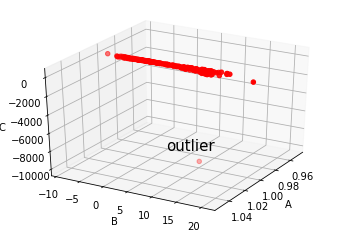

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(azim=30)
ax.scatter(X[:,0], X[:,1], y,color='r')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
ax.text(1,3,-9500,'outlier',size=15)

plt.show()
# As we can see the data points, it looks like a linear line(flat surface)
# Also, can can see some points which locate far from the cluser of the most of data points 

If I choose a linear regression model without any regularization. I can simply use Normal Equation to cacluate the Beta(Thetas) coefficent of the linear model. The problem is time complexity to caculate inverse(X) is with general methods $O(n^{2.4})$ ~ $O(n^{3})$. so as the number of data's features, computation speed gets very slow.  


<b>Method 1. Normal Equation: </b> A Matrix Formulation of the Multiple Variables Regression Model

$Y=X\beta+e$ 

$ Cost(\mathbf \beta) = \| \mathbf e \|^2 = \| \mathbf y - X \mathbf \beta\|^2$(Least Squares)

....

$\beta=(X^{'}X)^{-1}X^{'}Y$


$C=\beta_0+\beta_1A+\beta_2B$


In [7]:
Beta1 = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [8]:
Beta1

array([[-19.37573602],
       [ -8.04369803],
       [ -1.76710985]])

In [9]:
lambdaa = 100
I = np.eye(3)
Beta1_ridge=np.linalg.inv(X.transpose().dot(X) + lambdaa*I).dot(X.transpose()).dot(y)
Beta1_ridge

array([[-12.55529138],
       [ -8.35392559],
       [ -2.71927659]])

In [10]:
xs = np.tile(np.arange(-10,2,0.01), (1200,1))
ys = np.tile(np.arange(-10,30,0.1/3), (1200,1)).T
zs = Beta1[0][0] + xs*Beta1[1][0]  + ys*Beta1[2][0]
zs1_ridge = Beta1_ridge[0][0] + xs*Beta1_ridge[1][0]  + ys*Beta1_ridge[2][0] 

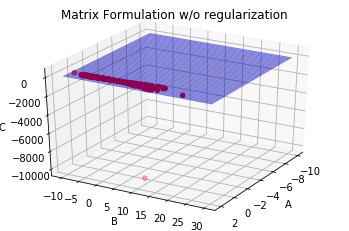

Beta_0:-19.38, Beta_1:-8.04, Beta_2:-1.77  


In [11]:
# Let's plot this regressor
def plot_3d(xs,ys,zs,col,title):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.view_init(azim=30)
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_zlabel('C')
    ax.scatter(X[:,0], X[:,1], y,color='r') 
    ax.plot_surface(xs,ys,zs, alpha=0.5,color=col)
    ax.set_title(title)
    plt.show()
    
plot_3d(xs,ys,zs,'b','Matrix Formulation w/o regularization')
print('Beta_0:{:.2f}, Beta_1:{:.2f}, Beta_2:{:.2f}  '.format(Beta1[0][0],Beta1[1][0],Beta1[2][0]))


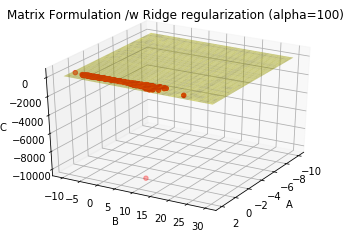

Beta_0:-12.56, Beta_1:-8.35, Beta_2:-2.72  


In [12]:
plot_3d(xs,ys,zs1_ridge,'y','Matrix Formulation /w Ridge regularization (alpha=100)')
print('Beta_0:{:.2f}, Beta_1:{:.2f}, Beta_2:{:.2f}  '.format(Beta1_ridge[0][0],Beta1_ridge[1][0],Beta1_ridge[2][0]))


<b>Method 2. A Gradient Descent: </b> Gradient Descent for Multiple Variables Linear Regression without regularization
 

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 

![Image of Gradient Descent](https://miro.medium.com/max/1400/1*G1v2WBigWmNzoMuKOYQV_g.png)


In [13]:
theta = np.zeros([1,3]).T
# learning rate
alpha = 0.005 
# number of interation
iters = 10000
# regulariation_ind : if we want to penalize the size of coef, put regulariation_index = True and set the lambda (alpha)

#######################################################
def cost_fun(X2,y2,theta2,lamb2):
    se = np.power((X2.dot(theta2)-y2),2)
    reg = lamb2*np.sum(np.square(theta2))
    return (np.sum(se)+reg)/(2 * len(X2))


def linear_regression(X,y,theta,iters,alpha,regulariation_ind,*lambdaa):
    if not regulariation_ind: # if we use just linear regression w/o regularization
        lamb = 0 
    else: lamb = lambdaa[0]
    # gradient descent fitting process
    cost = np.zeros(iters)
    for i in range(iters):
        theta -= (alpha/len(X)) * (X.T@(X@theta - y) + lamb*theta)
        cost[i] = cost_fun(X,y,theta,lamb)
    return theta



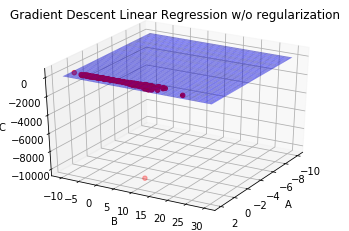

Beta_0:-19.38, Beta_1:-8.04, Beta_2:-1.77  


In [14]:
Beta2= linear_regression(X,y,theta,iters,alpha,False)
zs2 = Beta2[0][0] + xs*Beta2[1][0]  + ys*Beta2[2][0]
plot_3d(xs,ys,zs2,'b','Gradient Descent Linear Regression w/o regularization')
print('Beta_0:{:.2f}, Beta_1:{:.2f}, Beta_2:{:.2f}  '.format(Beta2[0][0],Beta2[1][0],Beta2[2][0]))

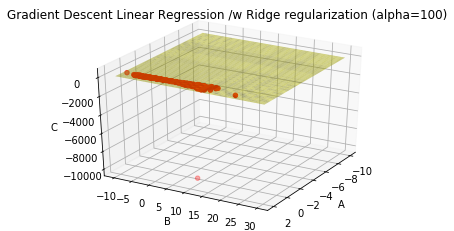

Beta_0:-12.56, Beta_1:-8.35, Beta_2:-2.72  


In [16]:
zs2_ridge = Beta2_ridge[0][0] + xs*Beta2_ridge[1][0]  + ys*Beta2_ridge[2][0]

plot_3d(xs,ys,zs2_ridge,'y','Gradient Descent Linear Regression /w Ridge regularization (alpha=100)')
print('Beta_0:{:.2f}, Beta_1:{:.2f}, Beta_2:{:.2f}  '.format(Beta2_ridge[0][0],Beta2_ridge[1][0],Beta2_ridge[2][0]))

In [17]:
## just to double check my numbers with sklearn regressors 

In [18]:
from sklearn.linear_model import Ridge, LinearRegression

In [19]:
reg = LinearRegression(fit_intercept=False).fit(X, y,)
reg.coef_ # numbers look similar

array([[-19.37573602,  -8.04369803,  -1.76710985]])

In [20]:
clf = Ridge(alpha=100,fit_intercept=False)
clf.fit(X, y)
clf.coef_ # numbers look similar

array([[-12.55529138,  -8.35392559,  -2.71927659]])